In [5]:
import time
import glob
import re

import numpy as np
import pandas as pd

import networkx as nx

import email

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang import listserv
from bigbang.listserv import ListservArchive, ListservList, ListservMessageParser
from bigbang.analysis.listserv import ListservArchive as MArchive
from bigbang.analysis.listserv import ListservList as MList

plt.style.use("publication_jcap.mplstyle")

In [6]:
color = [
    Color(rgb=(np.array([5, 102, 141]) / 255)),
    Color(rgb=(np.array([67, 170, 139]) / 255)),
    Color(rgb=(np.array([248, 150, 30]) / 255)),
    Color(rgb=(np.array([249, 65, 68]) / 255)),
]
color = mpl.colors.ListedColormap([c.rgb for c in color])

In [7]:
mlist_name = "3GPP_TSG_GERAN_TDOC"
mlist = ListservList.from_mbox(
    name=mlist_name,
    filepath=f"/home/christovis/AGE/datactive/bigbang/archives/3GPP/{mlist_name}.mbox",
)
df_mlist = mlist.to_pandas_dataframe(include_body=False)

In [8]:
columns = [
    # "sender",
    # "reply-to",
    "from",
    "comments-to",
    # "in-reply-to",
]
df = df_mlist[columns].dropna()
dic = MList.get_messaging_network(df)

In [9]:
def directed_graph_between_users(nw: dict):
    """
    Return directed graph for who follows whom.
    """
    # initialise graph
    DG = nx.DiGraph()
    # create nodes
    [DG.add_node(sender) for sender in nw.keys()]
    [
        DG.add_node(receiver)
        for receivers in nw.values()
        for receiver in receivers.keys()
    ]
    # create edges
    for sender, receivers in nw.items():
        for receiver, nr_msgs in receivers.items():
            DG.add_edge(sender, receiver, weight=nr_msgs)
    return DG

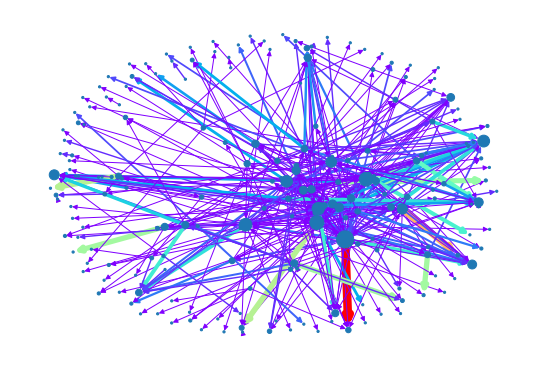

In [10]:
DG = directed_graph_between_users(dic)

edges, weights = zip(*nx.get_edge_attributes(DG, "weight").items())

weights = np.sqrt(np.array(list(weights)))

node_size = np.array([x * 1e3 for x in nx.degree_centrality(DG).values()])

bounds = np.linspace(np.min(node_size), np.max(node_size), len(node_size))
norm = mpl.colors.BoundaryNorm(bounds, plt.cm.rainbow.N)

nx.draw(
    DG,
    with_labels=False,
    node_size=node_size,
    # node_color=[norm],
    width=weights,
    edgelist=edges,
    edge_color=weights,
    edge_cmap=plt.cm.rainbow,
)

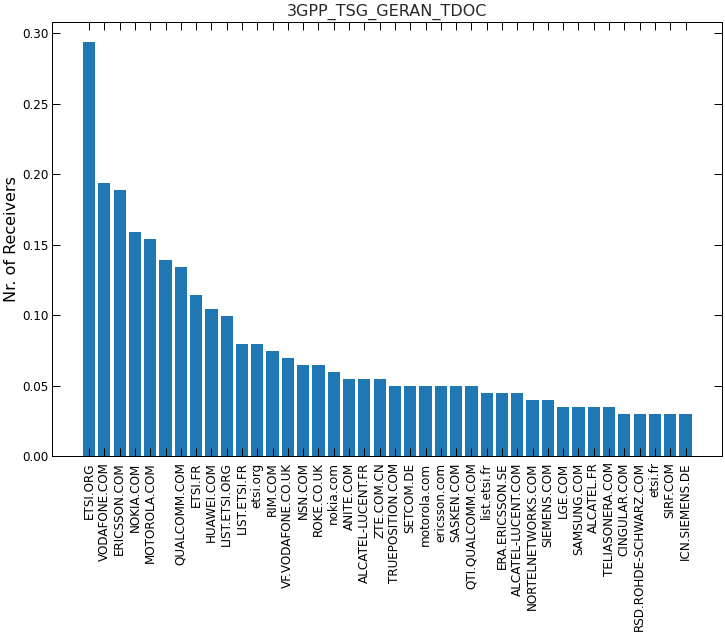

In [17]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(12, 8),
    sharex="col",
    sharey="row",
    facecolor="w",
    edgecolor="w",
)
fig.subplots_adjust(
    hspace=0.0,
    wspace=0.0,
)

# get degree centrality
adj = nx.degree_centrality(DG)

# sort
labels = list(adj.keys())
values = np.array(list(adj.values()))
indx = np.argsort(values).astype(int)[::-1]
labels = [labels[ii] for ii in indx]
values = values[indx]

nr_vis = 40

ax.bar(
    np.arange(len(labels[:nr_vis])),
    values[:nr_vis],
)


ax.minorticks_off()

ax.set_xticks(np.arange(len(labels[:nr_vis])))
ax.set_xticklabels(labels[:nr_vis], rotation=90)

ax.set_ylabel("Nr. of Receivers")

ax.set_title(mlist_name)

"""
plt.savefig(
    f"{filedsc}_nraffs_nrmems.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""
plt.show()

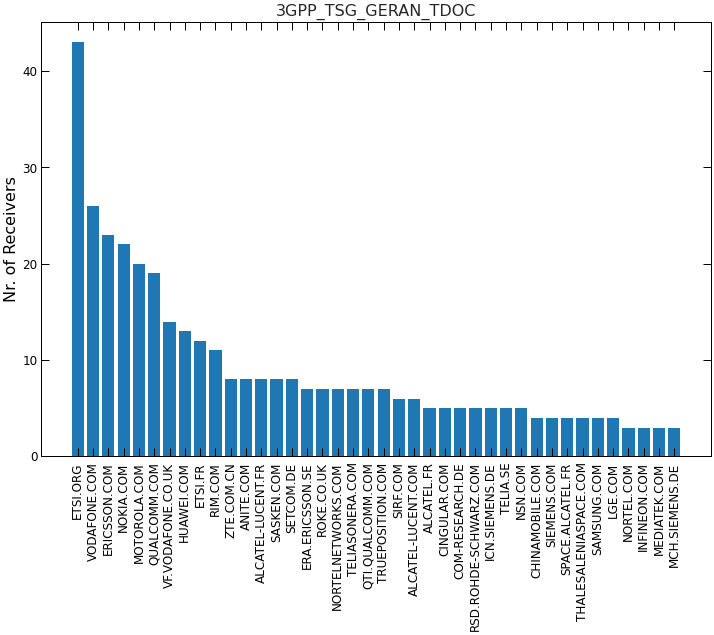

In [18]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(12, 8),
    sharex="col",
    sharey="row",
    facecolor="w",
    edgecolor="w",
)
fig.subplots_adjust(
    hspace=0.0,
    wspace=0.0,
)

# get adjacencies
adj = {key: len(list(value.keys())) for key, value in DG.adjacency()}
adj = {key: value for key, value in adj.items() if value != 0}

# sort
labels = list(adj.keys())
values = np.array(list(adj.values()))
indx = np.argsort(values).astype(int)[::-1]
labels = [labels[ii] for ii in indx]
values = values[indx]

nr_vis = 40

ax.bar(
    labels[:nr_vis],
    values[:nr_vis],
)

ax.minorticks_off()
ax.set_xticks(np.arange(len(labels[:nr_vis])))
ax.set_xticklabels(labels[:nr_vis], rotation=90)
ax.set_ylabel("Nr. of Receivers")
ax.set_title(mlist_name)

plt.show()

For network processes, a typical initial analysis is to identify structurally important, or “central”, variables. Such an analysis can also help pinpoint central drivers of disease in CLDs (McGlashan et al. 2016). To this end, we calculated the betweenness centrality (BC) and close- ness centrality (CC) for each of the variables in the CLD.

To assess whether networks have functional structure, we repurpose an existing measure that captures a distinctive feature of local connectivity in functional networks. Link prediction performance on PPI networks suggests that three-step closure is more common than two-step closure (Kovács et al., 2019). That is, closed squares are more prominent than are closed triangles. We measure this using spectral bipartivity, which quantifies the abundance of even vs. odd cycles in a network’s local connectivity structure (Estrada and Gómez-Gardeñes, 2016), in comparison to random expectation; functional networks have higher-than-random spectral bipartivity.

Spectral bipartivity, a measure that quantifies the over-representation of even paths in these networks.